# STOCK MARKET PERFORMANCE ANALYSIS USING PYTHON

- Stock market performance analysis can be used to inform investment decisions and help investors make informed decisions about buying or selling stocks.
- Stock Market Performance Analysis involves calculating moving averages, measuring volatility, conducting correlation analysis and analyzing various aspects of the stock market to gain a deeper understanding of the factors that affect stock prices and the relationships between the stock prices of different companies.
- a structured process of stock market performance analysis, involves collecting historical stock price data of different companies from trusted sources such as Yahoo Finance, visualizing data using various charts, calculating movements, averages and volatility for each company, and performing correlation analysis to analyze the relationships between different stock prices.

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import seaborn.objects as so

In [124]:
start_date = datetime.now() - pd.DateOffset(months=3)
end_date = datetime.now()

In [125]:
tickers = ["AAPL", "AMZN", "TSLA", "NFLX"]

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [126]:
df = df.reset_index()
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-05-16,171.990005,173.139999,171.800003,172.070007,171.837967,42110300
1,AAPL,2023-05-17,171.710007,172.929993,170.419998,172.690002,172.457123,57951600
2,AAPL,2023-05-18,173.000000,175.240005,172.580002,175.050003,174.813934,65496700
3,AAPL,2023-05-19,176.389999,176.389999,174.940002,175.160004,174.923798,55772400
4,AAPL,2023-05-22,173.979996,174.710007,173.449997,174.199997,173.965073,43570900


## PERFORMANCE OF COMPANIES ON STOCK MARKET

<Axes: xlabel='Date', ylabel='Close'>

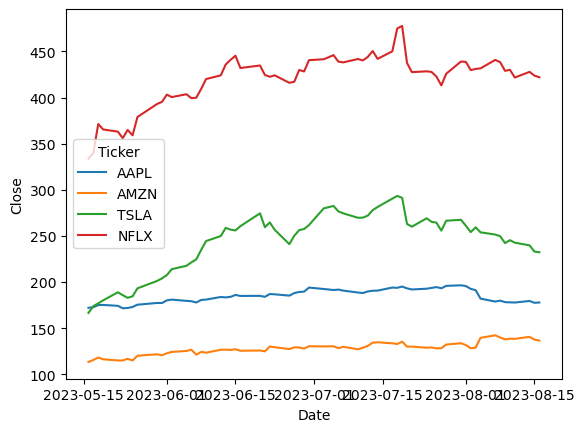

In [127]:
sns.lineplot(df, x="Date", y="Close", hue="Ticker")

## FACETED AREA CHART

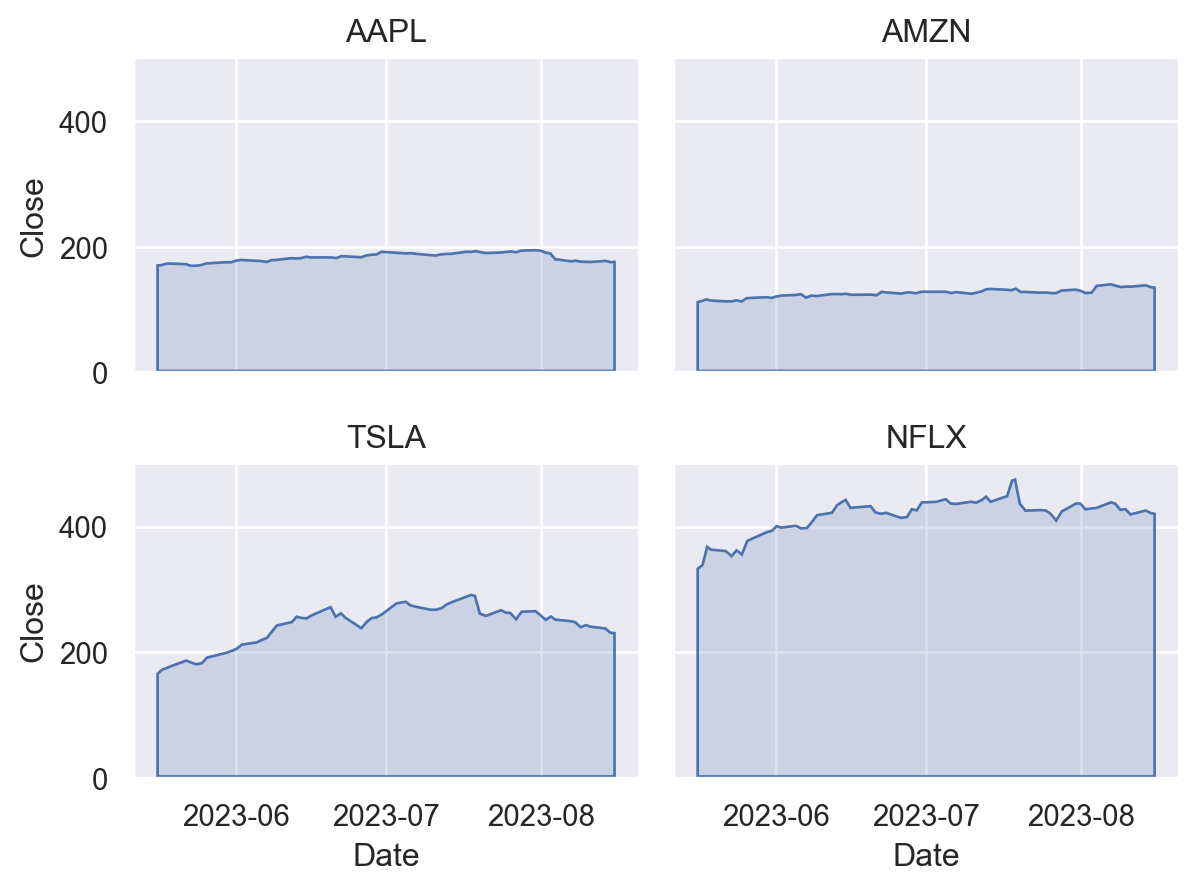

<Figure size 1000x1800 with 0 Axes>

In [128]:
plt.figure(figsize=(10,18))
p = so.Plot(df, "Date", "Close").facet("Ticker", wrap=2)
p.add(so.Area())


## MOVING AVERAGES

- A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price

In [129]:
df["ma10"] = df.groupby("Ticker")["Close"].rolling(window=10).mean().reset_index(0, drop=True)
df["ma20"] = df.groupby("Ticker")["Close"].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['ma10', 'ma20']])

Moving Averages for AAPL
          ma10        ma20
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
59  186.844002  190.055502
60  185.040001  189.410501
61  183.341002  188.684001
62  181.525002  187.870001
63  180.053001  187.008001

[64 rows x 2 columns]
Moving Averages for AMZN
           ma10        ma20
64          NaN         NaN
65          NaN         NaN
66          NaN         NaN
67          NaN         NaN
68          NaN         NaN
..          ...         ...
123  135.284003  133.178001
124  135.904002  133.364502
125  136.593004  133.715002
126  137.191003  133.957002
127  138.020143  134.014072

[64 rows x 2 columns]
Moving Averages for NFLX
           ma10        ma20
192         NaN         NaN
193         NaN         NaN
194         NaN         NaN
195         NaN         NaN
196         NaN         NaN
..          ...         ...
251  433.361002  436.73

In [131]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'ma10', 'ma20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

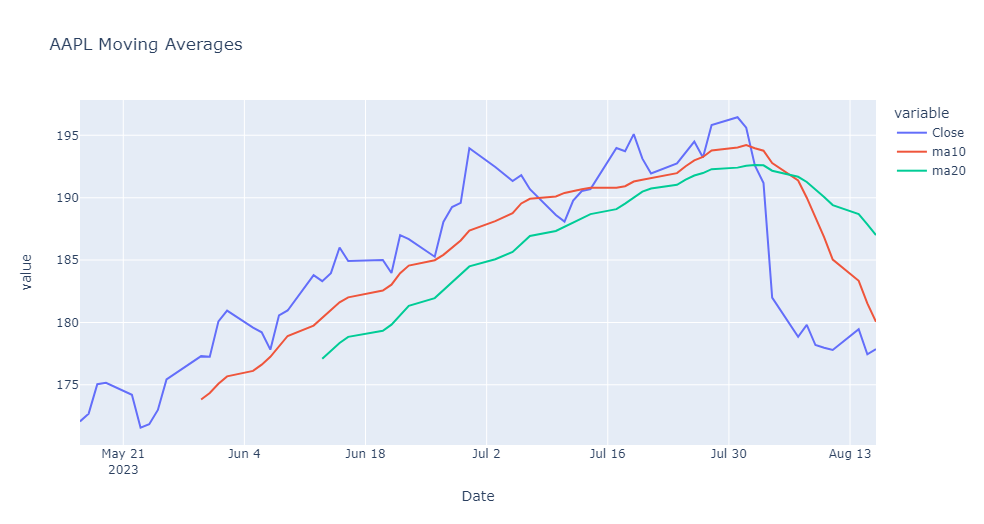

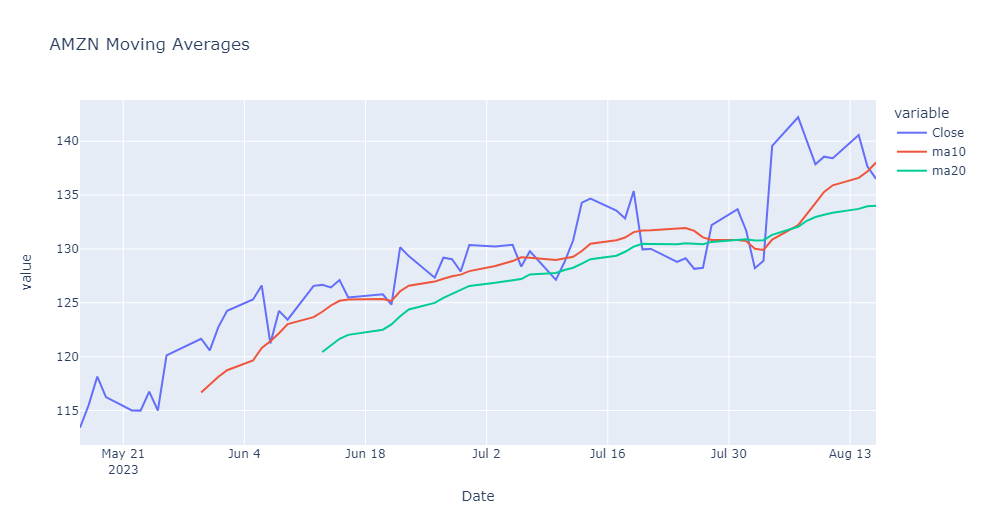

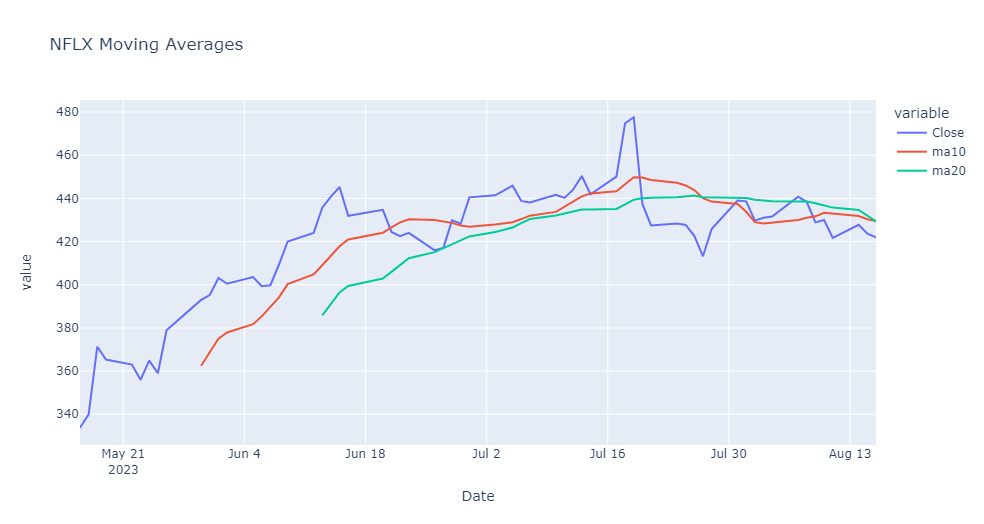

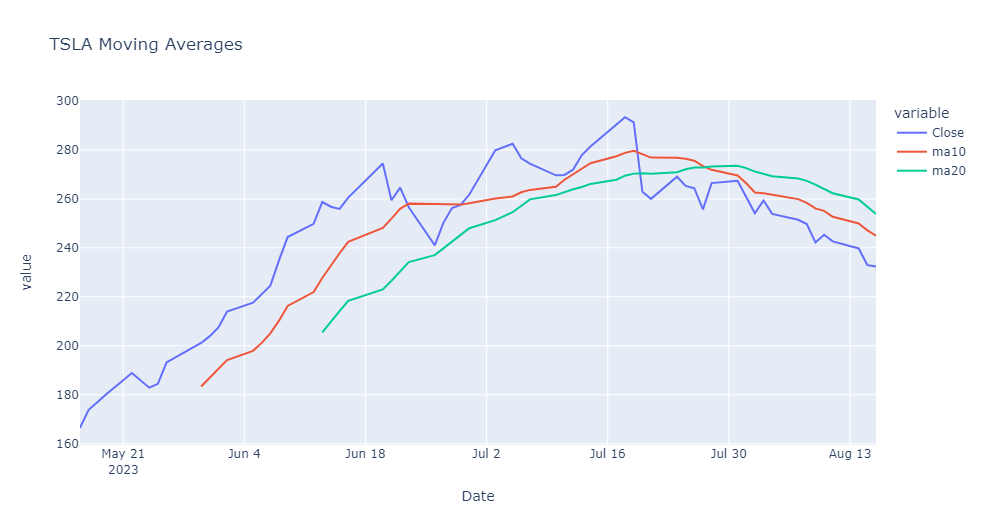

- The output shows four separate graphs for each company. When the MA10 crosses above the MA20, it is considered a bullish signal indicating that the stock price will continue to rise. Conversely, when the MA10 crosses below the MA20, it is a bearish signal that the stock price will continue falling.

## VOLTALITY OF STOCKS

- Market volatility is the frequency and magnitude of price movements, up or down. The bigger and more frequent the price swings, the more volatile the market is said to be.

In [119]:
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

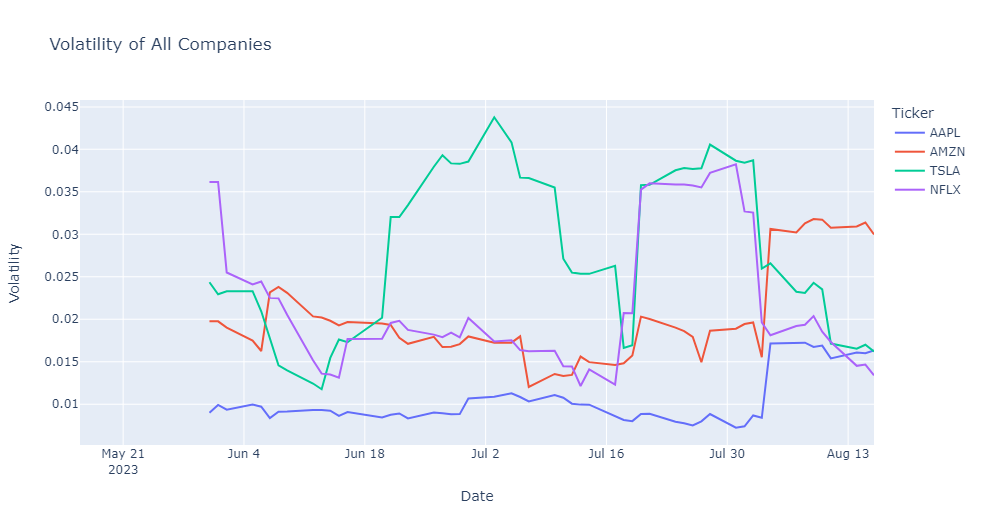

# CORRELATION BETWEEN AMAZON AND APPLE

In [120]:
# create a DataFrame with the stock prices of Apple and Microsoft
apple = df.loc[df['Ticker'] == 'AAPL', ['Date', 'Close']].rename(columns={'Close': 'AAPL'})
amazon = df.loc[df['Ticker'] == 'AMZN', ['Date', 'Close']].rename(columns={'Close': 'AMZN'})
df_corr = pd.merge(apple, amazon, on='Date')

# create a scatter plot to visualize the correlation
fig = px.scatter(df_corr, x='AAPL', y='AMZN', 
                 trendline='ols', 
                 title='Correlation between Apple and Amazon')
fig.show()

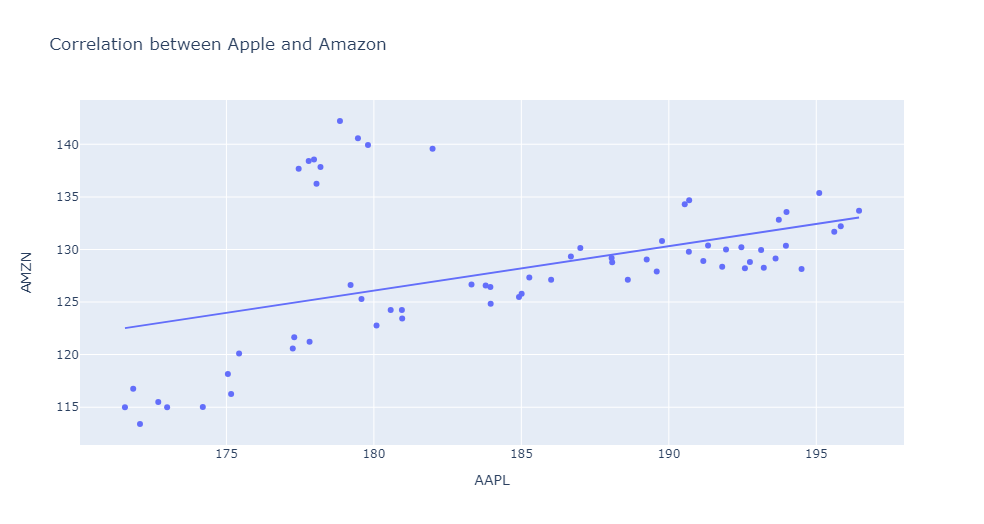

- There is a linear relationship between the stock prices of Apple and Amazon, which means that when the stock price of Apple increases, the stock price of Amazon also tends to increase. It is a sign of a strong correlation or similarity between the two companies, which can be due to factors such as industry trends, market conditions, or common business partners or customers. For investors, this positive correlation may indicate an opportunity to diversify their portfolio by investing in both companies, as both stocks may offer similar potential returns and risks.